#### Importing the libraries

## Assignment 6
    1. Name: Digambar Chaure
    2. Batch: P-10
    3. Roll No.: 43216
    
   ### Problem Statement :
     Object detection using Transfer Learning of CNN architectures

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.14.0'

#### Preprocessing for dataset

In [2]:
img_generator = tf.keras.preprocessing.image.ImageDataGenerator(#rotation_range=90,
                                                                brightness_range=(0.5,1),
                                                                #shear_range=0.2,
                                                                #zoom_range=0.2,
                                                                channel_shift_range=0.2,
                                                                horizontal_flip=True,
                                                                vertical_flip=True,
                                                                rescale=1./255,
                                                                validation_split=0.3)

In [3]:
# import zipfile

# Create a ZipFile object for the zip file you want to extract
# zipfile = zipfile.ZipFile('101_ObjectCategories.zip')

# # Call the extract() method on the ZipFile object, passing in the path to the file you want to extract and the path to the directory where you want to extract it
# zipfile.extract('101_ObjectCategories', 'extracted')

# extracted_files = os.listdir(destination_directory)
# print("Extracted Files:", extracted_files)

import zipfile

# zip_file = '101_ObjectCategories.zip'
# destination_directory = './'

zip_ref = zipfile.ZipFile('101_ObjectCategories.zip', 'r')  
zip_ref.extractall('101_ObjectCategories')


In [4]:
root_dir = '101_ObjectCategories'
img_generator_flow_train = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="training")

img_generator_flow_valid = img_generator.flow_from_directory(
    directory=root_dir,
    target_size=(224, 224),
    batch_size=32,
    shuffle=True,
    subset="validation")

Found 6401 images belonging to 1 classes.
Found 2743 images belonging to 1 classes.


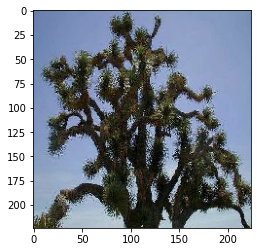

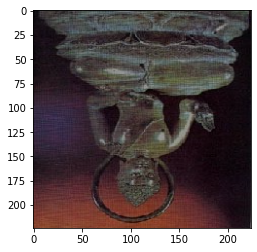

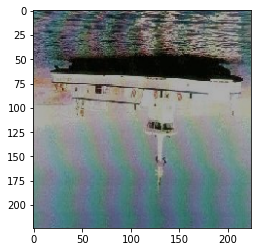

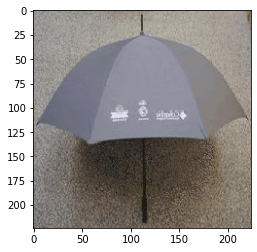

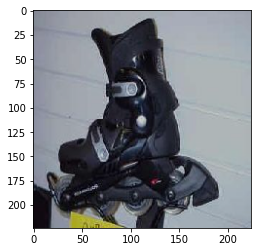

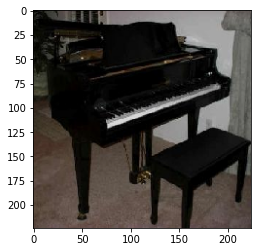

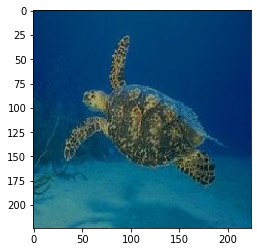

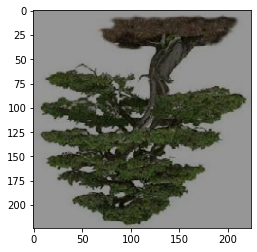

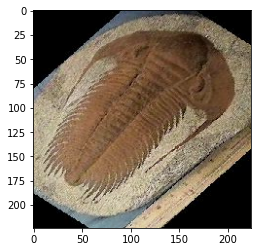

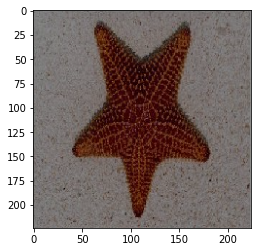

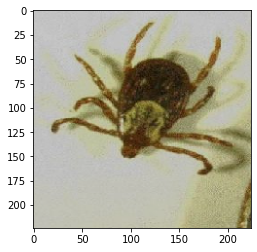

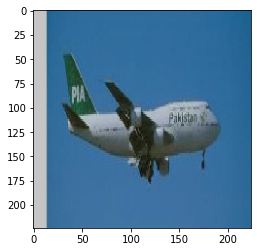

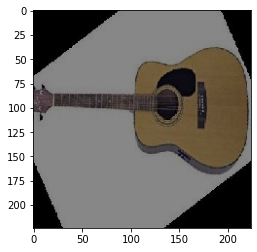

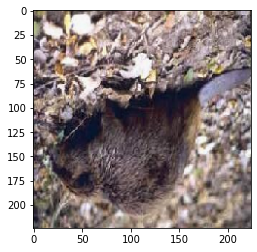

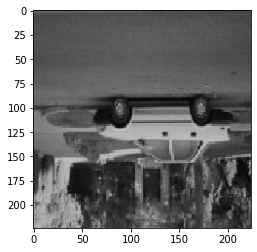

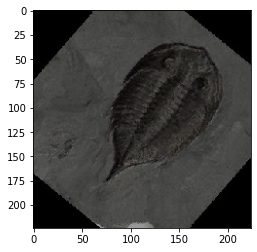

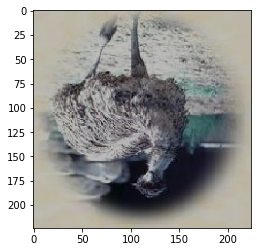

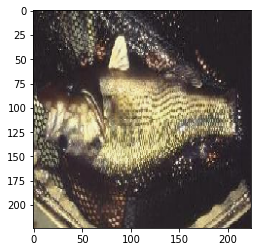

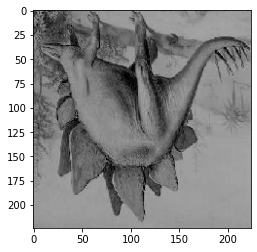

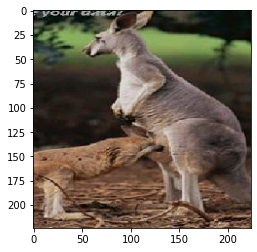

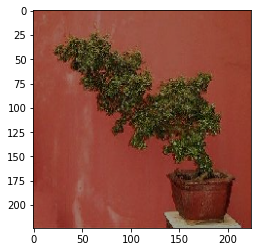

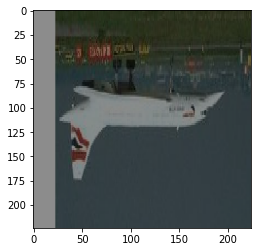

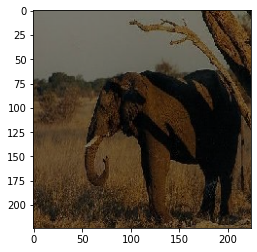

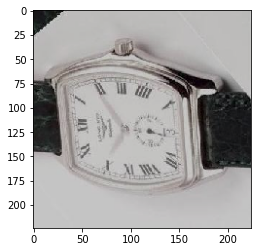

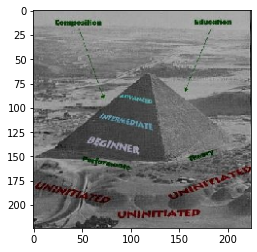

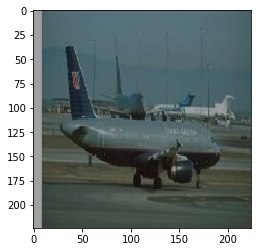

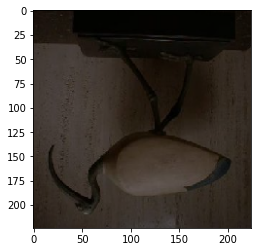

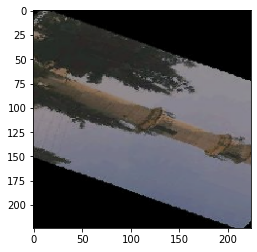

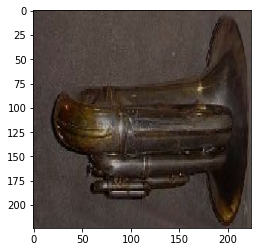

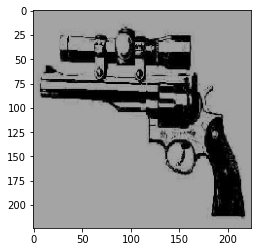

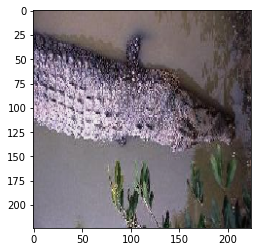

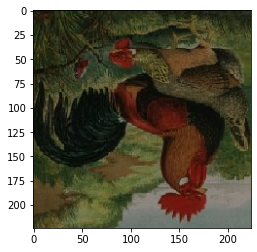

In [5]:
imgs, labels = next(iter(img_generator_flow_train))
for img, label in zip(imgs, labels):
    plt.imshow(img)
    plt.show()

#### a. Load in a pretrained model (InceptionV3)

In [ ]:
base_model = tf.keras.applications.InceptionV3(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

29712384/87910968 [=========>....................] - ETA: 2:44

#### b. Freeze parameters (weights) in model’s lower convolutional layers

In [ ]:
base_model.trainable = False

####  c. Add custom classifier with several layers of trainable parameters to model

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(102, activation="softmax")
])

In [ ]:
model.summary()

#### d. Train classifier layers on training data available for task

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50) #20,50

In [ ]:
# Visualise train / Valid Accuracy
plt.plot(model.history.history["categorical_accuracy"], c="r", label="train_accuracy")
plt.plot(model.history.history["val_categorical_accuracy"], c="b", label="test_accuracy")
plt.legend(loc="upper left")
plt.show()

#### e. Fine-tune hyper parameters and unfreeze more layers as needed

In [ ]:
base_model.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = [tf.keras.metrics.CategoricalAccuracy()])

In [ ]:
model.fit(img_generator_flow_train, validation_data=img_generator_flow_valid, steps_per_epoch=20, epochs=50) #20,50